# ***Network Intrusion Detection Using Deep Neural Networks***

# Mount Drive

In [ ]:
# prompt: code to mount the drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading dataset

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Intrusion Detection/UNSW_NB15_training-set.csv')
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


# Finding Unique value

In [ ]:
# prompt: code to find unique values in column label

# Assuming 'label' is the column name you want to analyze
unique_labels = data['label'].unique()
unique_labels

array([0, 1])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify object columns
object_columns = data.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each object column
for col in object_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Display the updated DataFrame
print(data.head())
print(data.info())  # Verify the object columns are now numerical


   id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0   1  0.121478    113        0      2      6      4     258     172   
1   2  0.649902    113        0      2     14     38     734   42014   
2   3  1.623129    113        0      2      8     16     364   13186   
3   4  1.681642    113        3      2     12     12     628     770   
4   5  0.449454    113        0      2     10      6     534     268   

        rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  74.087490  ...                 1               1             0           0   
1  78.473372  ...                 1               2             0           0   
2  14.170161  ...                 1               3             0           0   
3  13.677108  ...                 1               3             1           1   
4  33.373826  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0   

# Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# @title Normalization

# Assuming df is your DataFrame and 'label' is the target column
feature_columns = data.columns.difference(['label'])  # Exclude 'label' from the columns to normalize

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the feature columns
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Display the first few rows of the normalized DataFrame
print(data.head())


         id       dur     proto  service  state     spkts     dpkts    sbytes  \
0  0.000000  0.002025  0.856061     0.00   0.25  0.000520  0.000364  0.000018   
1  0.000006  0.010832  0.856061     0.00   0.25  0.001352  0.003463  0.000054   
2  0.000011  0.027052  0.856061     0.00   0.25  0.000728  0.001458  0.000026   
3  0.000017  0.028027  0.856061     0.25   0.25  0.001144  0.001093  0.000046   
4  0.000023  0.007491  0.856061     0.00   0.25  0.000936  0.000547  0.000039   

     dbytes      rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0  0.000012  0.000074  ...               0.0        0.000000          0.00   
1  0.002867  0.000078  ...               0.0        0.015625          0.00   
2  0.000900  0.000014  ...               0.0        0.031250          0.00   
3  0.000053  0.000014  ...               0.0        0.031250          0.25   
4  0.000018  0.000033  ...               0.0        0.609375          0.00   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm 

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
# @title #Dimensionality Reduction

# Load your dataset
# Assuming `data` is your DataFrame
data = data  # Replace with your file path

# Separate features and target
X = data.drop(columns=['id','label', 'proto', 'service', 'state'])  # Drop non-numeric columns
y = data['label']  # Target variable

# Encoding categorical columns
categorical_columns = ['proto', 'service', 'state']
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 10  # Choose the number of components to reduce to
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:")
print(explained_variance)

# Reduced dataset
reduced_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components)])
reduced_df['label'] = y.values

# Save or inspect reduced data
print(reduced_df.head())
reduced_df.to_csv("reduced_dataset.csv", index=False)  # Save the reduced dataset


Explained variance by each component:
[0.24810697 0.0966716  0.08910672 0.0768421  0.06266628 0.05312723
 0.04998202 0.0464001  0.03023267 0.0294947 ]
        PC1       PC2       PC3       PC4       PC5       PC6        PC7  \
0  2.101898 -0.460520 -0.467664 -0.519211 -0.585130 -0.500551  -0.129783   
1  2.002085  1.801488  0.293329 -1.905621 -1.288357 -0.288050  -0.474593   
2  3.557838  0.470962  1.203911 -1.279342 -0.473838  0.786769  -0.538762   
3  2.750504 -0.386659 -0.006600 -1.095905 -1.547972  2.646089  10.555093   
4  0.084208 -0.000569  3.754940 -0.888839 -0.422352 -0.036501  -0.589124   

        PC8       PC9      PC10  label  
0  0.122276 -0.379975 -0.479576      0  
1  0.287693 -0.051043  0.177361      0  
2  0.816844 -0.227868  0.182988      0  
3 -0.337667  0.309353  0.288694      0  
4 -0.861207 -1.027665  0.217712      0  


In [ ]:
# Drop the 'id' column
data = data.drop(columns=['id'])
# @title Drop unwanted columns

# Display the updated DataFrame
print(data.head())
print(data.info())  # Verify the 'id' column is removed


        dur  proto  service  state     spkts     dpkts    sbytes    dbytes  \
0  0.002025    113        0      2  0.000520  0.000364  0.000018  0.000012   
1  0.010832    113        0      2  0.001352  0.003463  0.000054  0.002867   
2  0.027052    113        0      2  0.000728  0.001458  0.000026  0.000900   
3  0.028027    113        3      2  0.001144  0.001093  0.000046  0.000053   
4  0.007491    113        0      2  0.000936  0.000547  0.000039  0.000018   

       rate      sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0  0.000074  0.988235  ...               0.0        0.000000          0.00   
1  0.000078  0.243137  ...               0.0        0.015625          0.00   
2  0.000014  0.243137  ...               0.0        0.031250          0.00   
3  0.000014  0.243137  ...               0.0        0.031250          0.25   
4  0.000033  0.996078  ...               0.0        0.609375          0.00   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm

In [ ]:
data = data.drop_duplicates()


In [ ]:
from sklearn.model_selection import train_test_split
# @title #Split dataset

# Assuming 'label' is the target column and others are features
X = data.drop(columns=['label'])  # Features
y = data['label']                 # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (86192, 43)
X_test shape: (21548, 43)
y_train shape: (86192,)
y_test shape: (21548,)


In [ ]:

# @title Oversampling
from imblearn.over_sampling import SMOTE
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)




# Build and Train the Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix


# Step 1: Load and clean the data
data = data
data = data.drop_duplicates()  # Remove duplicates

# Check for class distribution in the dataset
print("Class distribution before any processing:")
print(data['label'].value_counts())

# Step 2: Preprocess features and labels
X = data.drop(columns=['label'])  # Replace 'label' with your target column name
y = data['label']

# Split data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Step 3: Compute class weights (if class imbalance is suspected)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(y_train, axis=1)),
    y=np.argmax(y_train, axis=1)
)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

# Step 4: Build the model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.0005)  # Reduce learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Set callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Step 6: Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights_dict,
    verbose=1
)

# Step 7: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Step 8: Check the classification report and confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels
y_true_classes = np.argmax(y_test, axis=1)  # Get true class labels

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))



Class distribution before any processing:
label
1    55850
0    51890
Name: count, dtype: int64
Class weights: {0: 1.0381576411640008, 1: 0.9645478961504028}
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


943/943 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8339 - loss: 0.5617 - val_accuracy: 0.9561 - val_loss: 0.2302 - learning_rate: 5.0000e-04
Epoch 2/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9444 - loss: 0.2503 - val_accuracy: 0.9906 - val_loss: 0.1302 - learning_rate: 5.0000e-04
Epoch 3/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9734 - loss: 0.1608 - val_accuracy: 0.9974 - val_loss: 0.0819 - learning_rate: 5.0000e-04
Epoch 4/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9876 - loss: 0.1047 - val_accuracy: 0.9980 - val_loss: 0.0596 - learning_rate: 5.0000e-04
Epoch 5/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9931 - loss: 0.0718 - val_accuracy: 0.9990 - val_loss: 0.0424 - learning_rate: 5.0000e-04
Epoch 6/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9947 - loss: 0.0546 - val_accuracy: 0.9994 - val_loss: 0.0317 - learning_rate: 5.0000e-04
Epoch 7/50
943/943 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9968 - lo

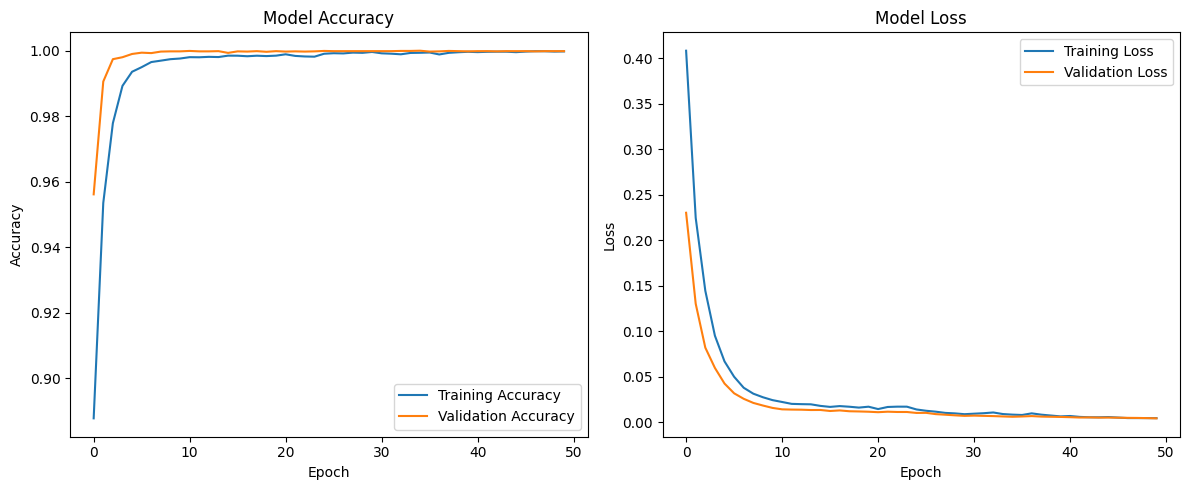

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


1011/1011 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9999 - loss: 0.0035
Test Loss: 0.0035
Test Accuracy: 0.9999


# Classification report and Confusion matrix

1011/1011 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15567
           1       1.00      1.00      1.00     16755

    accuracy                           1.00     32322
   macro avg       1.00      1.00      1.00     32322
weighted avg       1.00      1.00      1.00     32322

Confusion Matrix:
 [[15565     2]
 [    0 16755]]


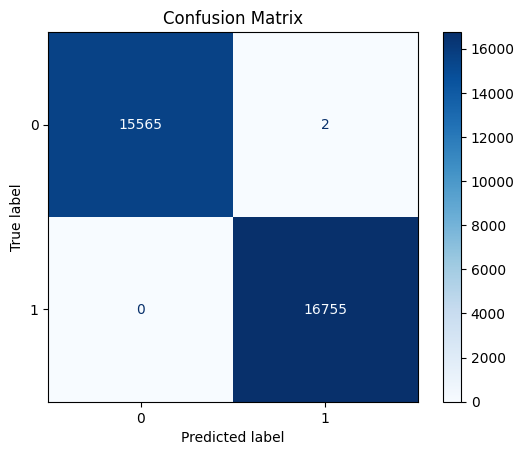

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 8: Predictions on test set
# Ensure y_pred and y_test are correctly shaped
y_pred = model.predict(X_test)

# If y_pred is 1D, reshape it to ensure proper shape
if len(y_pred.shape) == 1:
    y_pred = np.expand_dims(y_pred, axis=-1)

# If y_test is 1D, ensure it's correctly reshaped
if len(y_test.shape) == 1:
    y_test = np.expand_dims(y_test, axis=-1)

# Now extract predicted and true classes
y_pred_classes = np.argmax(y_pred, axis=-1)  # axis=-1 ensures it works regardless of shape
y_true_classes = np.argmax(y_test, axis=-1)

# Step 9: Generate classification report
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)

# Step 10: Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Display confusion matrix using sklearn's display utility
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_true_classes))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Performance metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Step 9: Performance metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')  # 'weighted' handles class imbalance
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Print individual metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")




Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


# Prediction

In [ ]:
# Get a single sample input from X_test (assuming X_test is a numpy.ndarray)
sample_input = X_test[92]  # Using a single row (change the index if needed)

# Reshape the input to be a 2D array (as model.predict expects 2D input)
sample_input = sample_input.reshape(1, -1)

# Make a prediction
sample_prediction = model.predict(sample_input)

# For binary classification: if the model outputs probabilities, choose the class with highest probability
# If it's a binary classifier, you might get [prob_class_0, prob_class_1], so we'll pick the class with max probability
if len(sample_prediction.shape) > 1:  # Check if the model returns probabilities
    sample_prediction = np.argmax(sample_prediction, axis=-1)  # Choose the class with the highest probability

# Display the result based on the prediction value
if sample_prediction[0] == 0:
    print("\nSample Prediction: Normal")
else:
    print("\nSample Prediction: Attack")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Sample Prediction: Attack
